# QUESTION

Use the breast cancer dataset in Sklearn to build a naive Bayes model to predict if a tumor is malignant or benign. Evaluate the performance of the model using cross-validation and confusion matrix.

### Breast Cancer

### Import Header Files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

### Load Data

In [2]:
breast_cancer = load_breast_cancer()
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df['target'] = breast_cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Data Information

In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [5]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Data Cleaning

In [8]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

<AxesSubplot:>

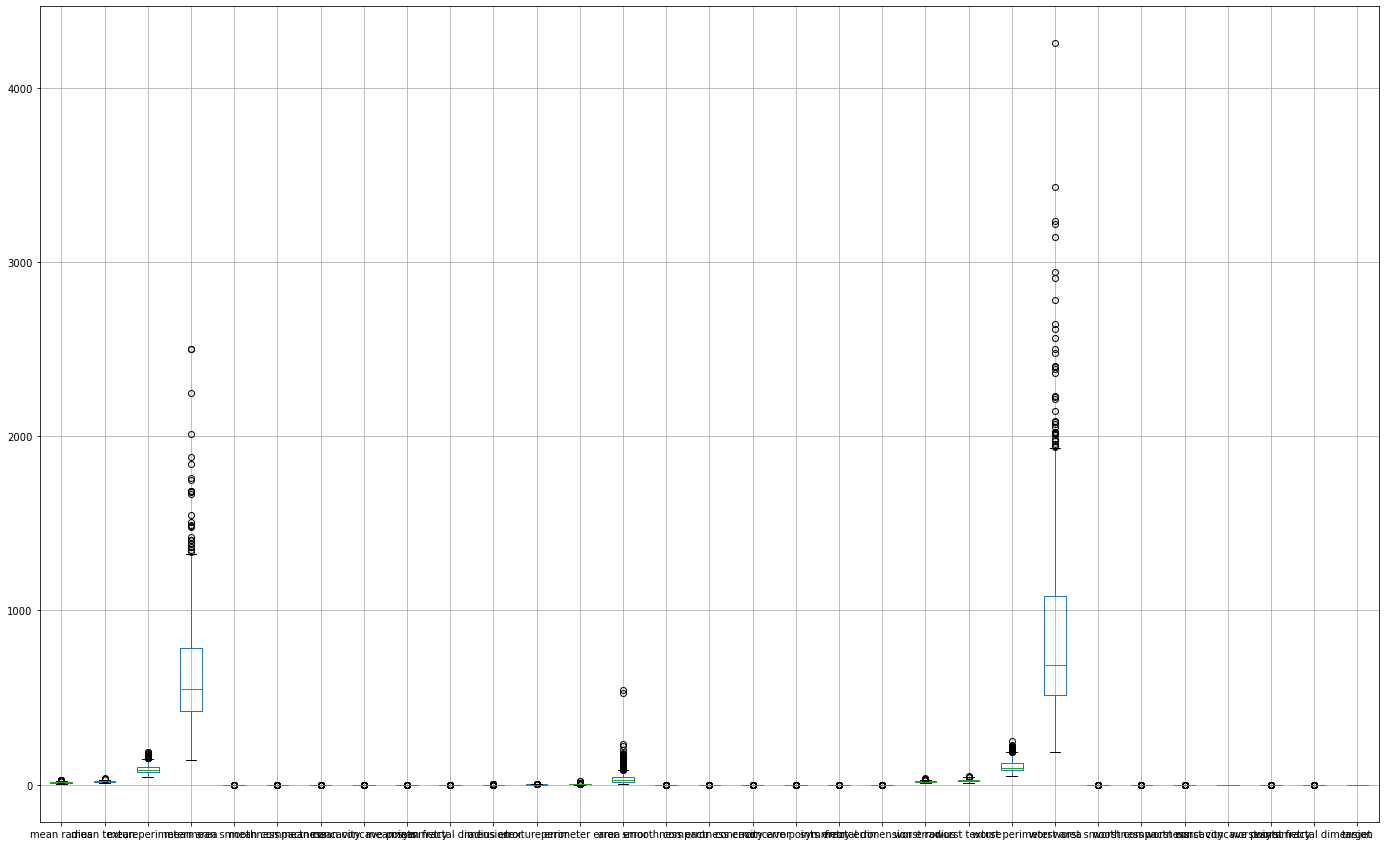

In [9]:
df.boxplot(figsize = (24, 15))

### Determining Classes

In [10]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

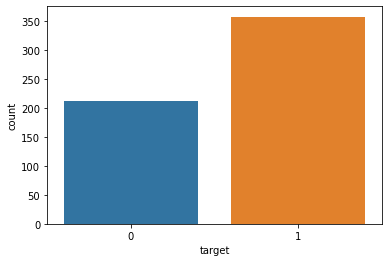

In [11]:
sns.countplot(df['target'])

### Balancing Classes

In [12]:
over_sample = SMOTE()
df1 = over_sample.fit_resample(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension','radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']], df['target'])
data = pd.DataFrame(df1[0])
data['target'] = df1[1]
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,...,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,0
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,...,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,0
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,...,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,0
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,...,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,0
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,...,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,23.290985,26.663741,154.184378,1679.752390,0.095541,0.170618,0.197053,0.125035,0.191368,0.063335,...,34.077701,205.982891,2926.776480,0.147307,0.412954,0.575373,0.258627,0.310608,0.087337,0
710,17.449742,21.096655,113.152330,942.811734,0.088226,0.092770,0.068119,0.052786,0.153355,0.054036,...,28.514483,134.132032,1229.024131,0.131402,0.250127,0.241683,0.140909,0.270188,0.072247,0
711,13.490453,17.856546,88.292833,555.174000,0.109670,0.136383,0.111644,0.065328,0.211778,0.068416,...,27.476287,103.543079,755.080853,0.163460,0.426074,0.483416,0.188644,0.377461,0.112327,0
712,14.575882,19.155993,95.733839,654.628864,0.103959,0.133878,0.133286,0.068621,0.201204,0.065565,...,29.295769,120.657426,1059.285731,0.164971,0.418308,0.488817,0.189465,0.440293,0.102859,0


In [13]:
data['target'].value_counts()

0    357
1    357
Name: target, dtype: int64

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

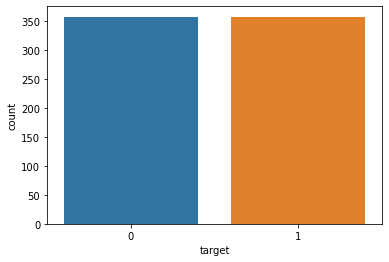

In [14]:
sns.countplot(data['target'])

### Data Scaling

In [15]:
scalar = MinMaxScaler()
scaled = scalar.fit_transform(data[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']])
data1 = pd.DataFrame(data = scaled, columns = data.columns)
data1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.771924,0.573343,0.762866,0.651645,0.387389,0.463892,0.461699,0.621444,0.431150,0.281703,...,0.587892,0.774804,0.673805,0.502788,0.374173,0.459563,0.888753,0.303781,0.211838,0.0
710,0.495468,0.385075,0.479320,0.339051,0.321354,0.225109,0.159604,0.262355,0.239168,0.085845,...,0.439618,0.416963,0.256543,0.397754,0.216198,0.193038,0.484224,0.224104,0.112865,0.0
711,0.308081,0.275500,0.307531,0.174623,0.514937,0.358881,0.261584,0.324693,0.534234,0.388702,...,0.411948,0.264620,0.140061,0.609455,0.386902,0.386115,0.648261,0.435562,0.375750,0.0
712,0.359453,0.319445,0.358951,0.216810,0.463385,0.351198,0.312291,0.341057,0.480829,0.328668,...,0.460442,0.349855,0.214826,0.619434,0.379368,0.390429,0.651081,0.559418,0.313646,0.0


### Data Representation

In [16]:
data1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.372458,0.338022,0.367943,0.246950,0.409577,0.287732,0.244524,0.286169,0.392030,0.271350,...,0.383027,0.319859,0.200596,0.424958,0.245018,0.247706,0.444968,0.278840,0.200746,0.500000
std,0.178311,0.139955,0.179645,0.162889,0.124932,0.164973,0.194252,0.205931,0.134595,0.144338,...,0.159192,0.179844,0.154589,0.150696,0.153509,0.167394,0.233747,0.123894,0.117296,0.500351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240026,0.241461,0.235022,0.128568,0.318647,0.159108,0.084261,0.116004,0.297601,0.167890,...,0.266603,0.181458,0.088773,0.327181,0.132014,0.111462,0.254175,0.197763,0.117277,0.000000
50%,0.332197,0.332799,0.326613,0.194761,0.407737,0.269830,0.207236,0.252063,0.381783,0.246630,...,0.380464,0.276358,0.147206,0.425807,0.214412,0.231401,0.440893,0.261726,0.175161,0.500000
75%,0.495753,0.420697,0.489151,0.341686,0.489031,0.382994,0.359888,0.429983,0.461490,0.345028,...,0.490005,0.441026,0.276858,0.518259,0.337229,0.358556,0.632289,0.332052,0.259429,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### OUTLIERS

### Detection

<AxesSubplot:>

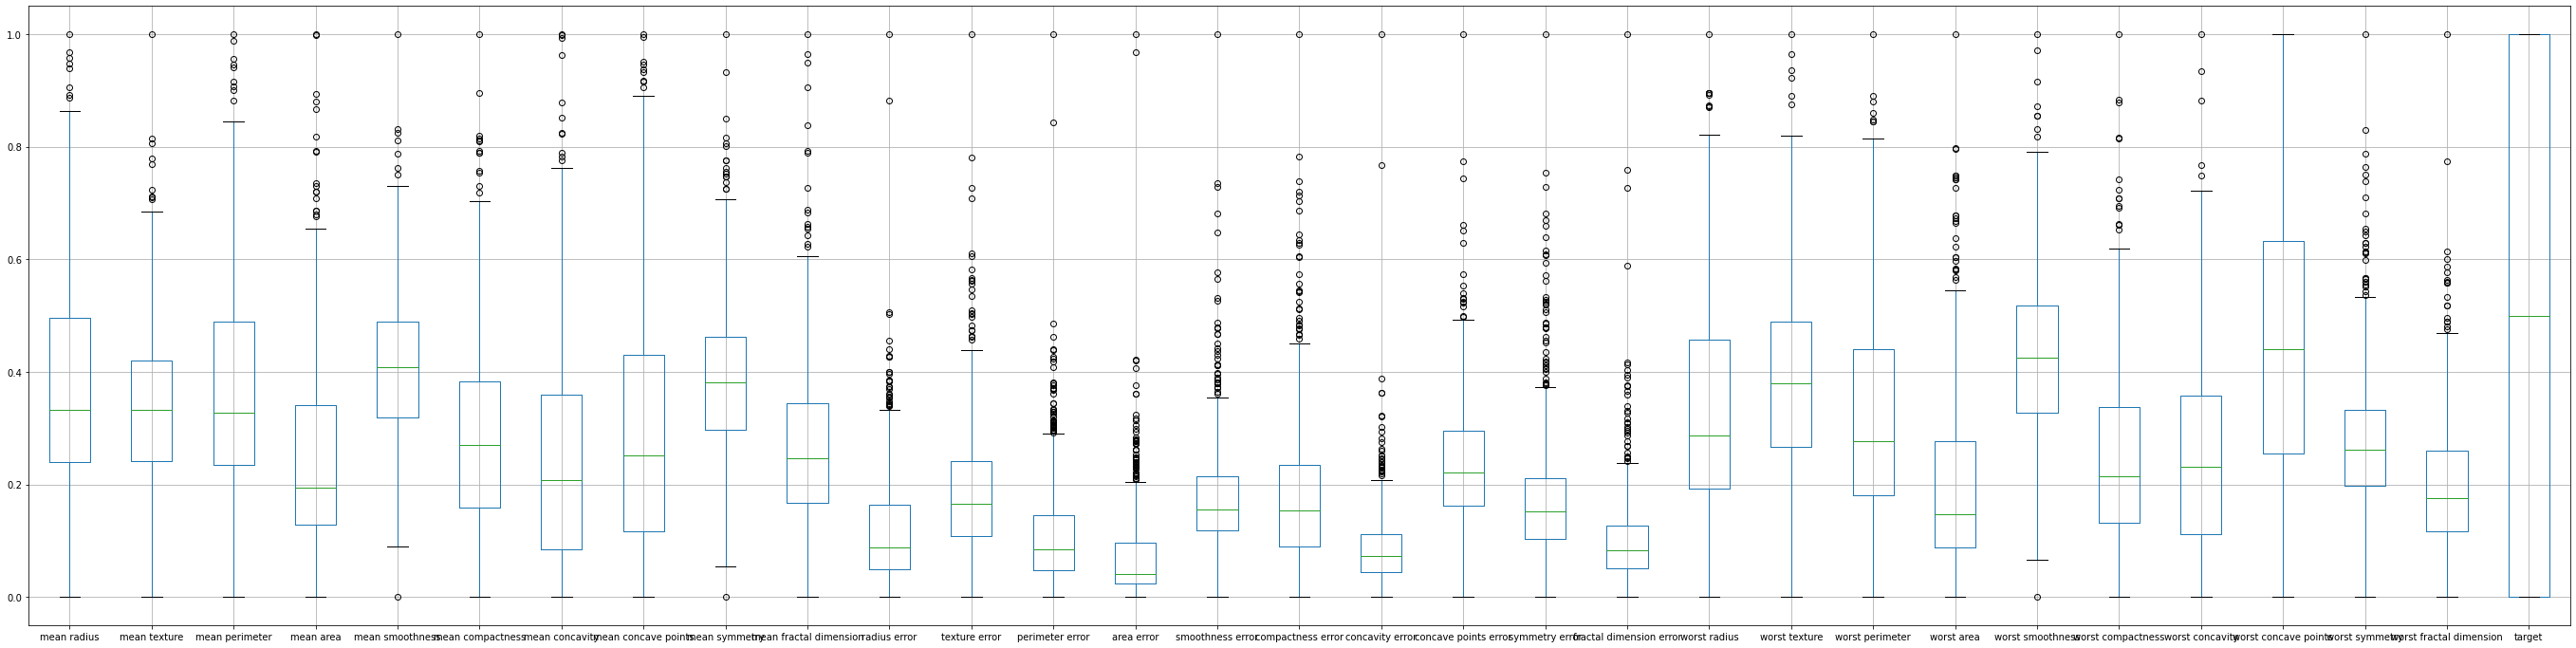

In [17]:
data1.boxplot(figsize = (48,12))

### Removal

In [18]:
def out_iqr(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    return lwr, upr 

In [19]:
for i in data1.columns:
    lwr, upr = out_iqr(data1, i)
    data1[i].clip(lwr, upr, inplace = True)
data1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.718824,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.533486,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.744607,0.718824,0.565604,0.522863,0.707323,0.610734,...,0.385928,0.241347,0.094008,0.804877,0.645051,0.548642,0.884880,0.533486,0.472657,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.771924,0.573343,0.762866,0.651645,0.387389,0.463892,0.461699,0.621444,0.431150,0.281703,...,0.587892,0.774804,0.558986,0.502788,0.374173,0.459563,0.888753,0.303781,0.211838,0.0
710,0.495468,0.385075,0.479320,0.339051,0.321354,0.225109,0.159604,0.262355,0.239168,0.085845,...,0.439618,0.416963,0.256543,0.397754,0.216198,0.193038,0.484224,0.224104,0.112865,0.0
711,0.308081,0.275500,0.307531,0.174623,0.514937,0.358881,0.261584,0.324693,0.534234,0.388702,...,0.411948,0.264620,0.140061,0.609455,0.386902,0.386115,0.648261,0.435562,0.375750,0.0
712,0.359453,0.319445,0.358951,0.216810,0.463385,0.351198,0.312291,0.341057,0.480829,0.328668,...,0.460442,0.349855,0.214826,0.619434,0.379368,0.390429,0.651081,0.533486,0.313646,0.0


In [20]:
data1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.371808,0.336874,0.367094,0.243946,0.408888,0.286135,0.242879,0.285617,0.390153,0.267942,...,0.382131,0.319360,0.196219,0.424061,0.242769,0.246742,0.444968,0.274499,0.198102,0.500000
std,0.176299,0.136301,0.177038,0.152954,0.122059,0.160010,0.188931,0.204183,0.128590,0.132758,...,0.156326,0.178277,0.140919,0.147689,0.145960,0.163990,0.233747,0.110416,0.107953,0.500351
min,0.000000,0.000000,0.000000,0.000000,0.063072,0.000000,0.000000,0.000000,0.051768,0.000000,...,0.000000,0.000000,0.000000,0.040563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240026,0.241461,0.235022,0.128568,0.318647,0.159108,0.084261,0.116004,0.297601,0.167890,...,0.266603,0.181458,0.088773,0.327181,0.132014,0.111462,0.254175,0.197763,0.117277,0.000000
50%,0.332197,0.332799,0.326613,0.194761,0.407737,0.269830,0.207236,0.252063,0.381783,0.246630,...,0.380464,0.276358,0.147206,0.425807,0.214412,0.231401,0.440893,0.261726,0.175161,0.500000
75%,0.495753,0.420697,0.489151,0.341686,0.489031,0.382994,0.359888,0.429983,0.461490,0.345028,...,0.490005,0.441026,0.276858,0.518259,0.337229,0.358556,0.632289,0.332052,0.259429,1.000000
max,0.879343,0.689550,0.870344,0.661362,0.744607,0.718824,0.773328,0.900951,0.707323,0.610734,...,0.825109,0.830379,0.558986,0.804877,0.645051,0.729197,1.000000,0.533486,0.472657,1.000000


<AxesSubplot:>

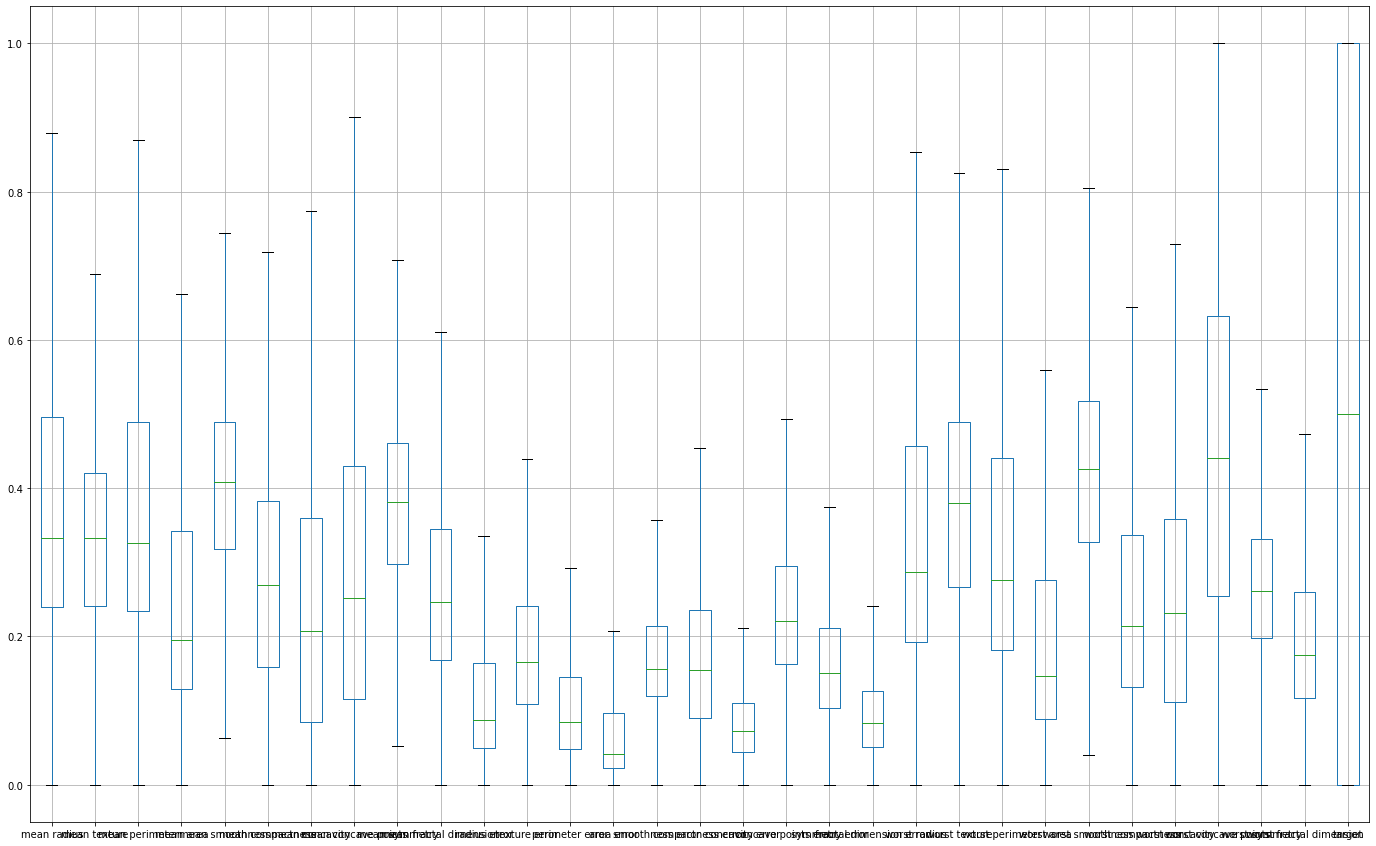

In [21]:
data1.boxplot(figsize = (24, 15))

### Determinimg Co-Relation in Features

In [22]:
data1.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.347519,0.998074,0.993142,0.202582,0.547564,0.715110,0.841187,0.169457,-0.287090,...,0.308799,0.969655,0.959964,0.148434,0.456571,0.569248,0.760098,0.178975,0.041647,-0.722760
mean texture,0.347519,1.000000,0.353385,0.351044,0.016772,0.258048,0.326387,0.319229,0.102609,-0.065740,...,0.906214,0.375847,0.359233,0.107898,0.287910,0.323053,0.322364,0.124086,0.125292,-0.439158
mean perimeter,0.998074,0.353385,1.000000,0.991451,0.238486,0.593452,0.749936,0.866381,0.203863,-0.238604,...,0.315213,0.973687,0.959685,0.178236,0.496289,0.603459,0.784923,0.203742,0.083575,-0.735779
mean area,0.993142,0.351044,0.991451,1.000000,0.198803,0.537952,0.714334,0.838270,0.170170,-0.272507,...,0.306624,0.969747,0.971339,0.148015,0.437560,0.558781,0.746089,0.163928,0.037237,-0.709928
mean smoothness,0.202582,0.016772,0.238486,0.198803,1.000000,0.683869,0.568268,0.579391,0.584539,0.605990,...,0.092898,0.269925,0.239976,0.815204,0.525018,0.498693,0.544470,0.437462,0.541471,-0.407823
mean compactness,0.547564,0.258048,0.593452,0.537952,0.683869,1.000000,0.897739,0.844185,0.616641,0.548342,...,0.268998,0.618469,0.557879,0.581492,0.882690,0.841130,0.833783,0.518113,0.694076,-0.624998
mean concavity,0.715110,0.326387,0.749936,0.714334,0.568268,0.897739,1.000000,0.935650,0.514276,0.320441,...,0.322844,0.758287,0.717739,0.482713,0.781040,0.895099,0.880565,0.425674,0.525196,-0.717668
mean concave points,0.841187,0.319229,0.866381,0.838270,0.579391,0.844185,0.935650,1.000000,0.474761,0.167860,...,0.315612,0.867942,0.836217,0.466814,0.697495,0.778635,0.915024,0.389046,0.385698,-0.773362
mean symmetry,0.169457,0.102609,0.203863,0.170170,0.584539,0.616641,0.514276,0.474761,1.000000,0.489324,...,0.127157,0.232190,0.197152,0.456666,0.513855,0.473181,0.458159,0.716515,0.473760,-0.362415
mean fractal dimension,-0.287090,-0.065740,-0.238604,-0.272507,0.605990,0.548342,0.320441,0.167860,0.489324,1.000000,...,-0.023019,-0.186000,-0.217623,0.520031,0.465341,0.348077,0.187164,0.345761,0.770256,-0.006070


### Features Selection

<AxesSubplot:>

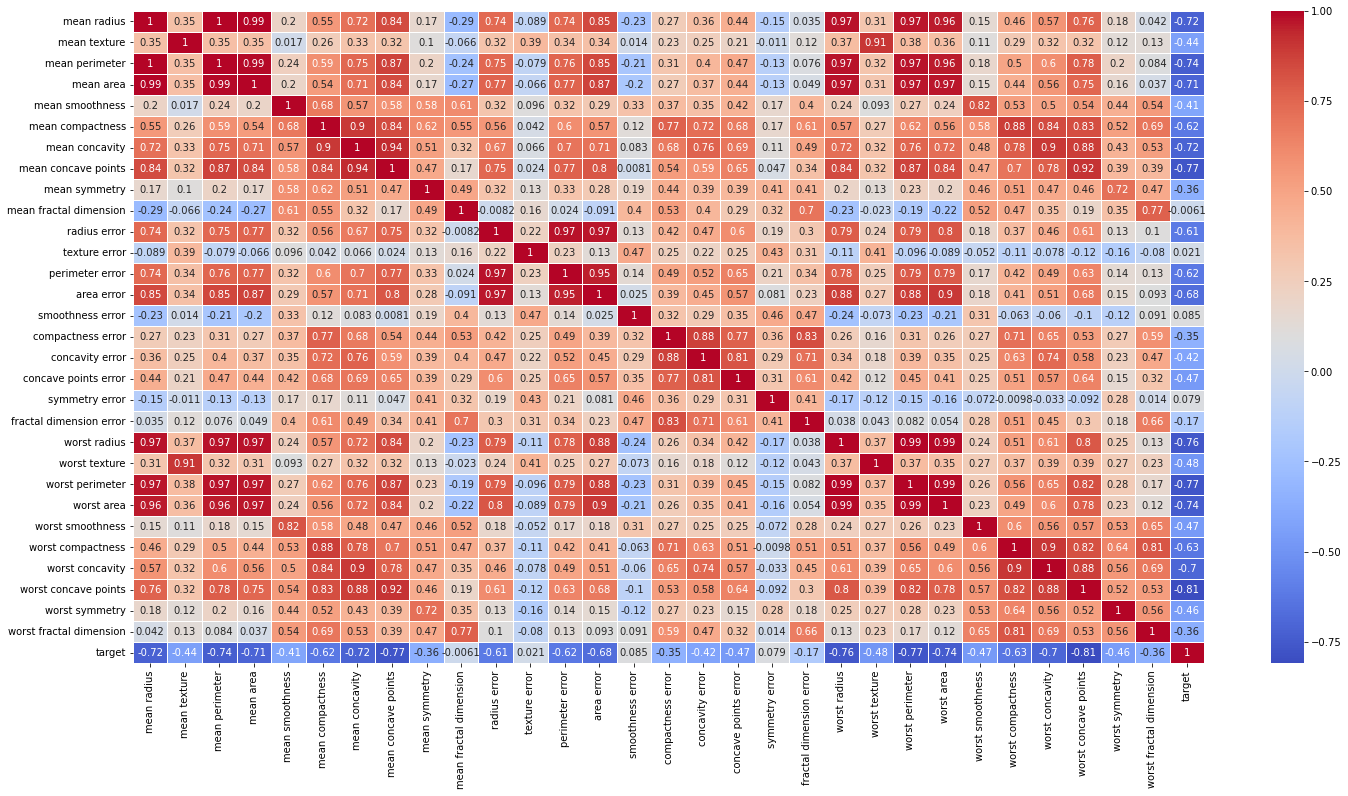

In [23]:
plt.figure(figsize = (24,12))
sns.heatmap(data1.corr(), annot = True, cmap = 'coolwarm', linewidths = 1)

In [24]:
col1 = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension','radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
col2 = ['target']

### GAUSSIAN MODEL TRAINING

In [25]:
X = data1[col1]
y = data1[col2]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 102)

In [27]:
gnbmodel = GaussianNB()
gnbmodel.fit(X_train, y_train)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Finding Parameters

In [28]:
pred = gnbmodel.predict(X_test)
print('Confusion matrix : ')
print(confusion_matrix(y_test, pred))
print('Accuracy : ', accuracy_score(y_test, pred))

Confusion matrix : 
[[109   8]
 [  7 112]]
Accuracy :  0.9364406779661016


### GAUSSIAN MODEL EVALUATION

### Mathematical formulas

In [29]:
print("Classification Report : \n", classification_report(y_test,pred))

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       117
         1.0       0.93      0.94      0.94       119

    accuracy                           0.94       236
   macro avg       0.94      0.94      0.94       236
weighted avg       0.94      0.94      0.94       236



### CROSS - VALIDATION OF GAUSSIAN MODEL

In [30]:
pd.set_option('display.max_columns', None)

In [31]:
data[99:100]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
99,14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,0.2895,1.851,2.376,26.85,0.008005,0.02895,0.03321,0.01424,0.01462,0.004452,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353,0


In [32]:
data1[19:20]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,0.310426,0.157254,0.301776,0.179343,0.407692,0.189896,0.156139,0.237624,0.416667,0.162174,0.05736,0.094678,0.061301,0.0313,0.229425,0.092739,0.060278,0.2491,0.167699,0.048547,0.255425,0.192964,0.24548,0.129276,0.480948,0.14554,0.190895,0.442612,0.278336,0.115112,1.0


### Classification Of New Data

In [33]:
newd1 = np.array([[14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,0.2895,1.851,2.376,26.85,0.008005,0.02895,0.03321,0.01424,0.01462,0.004452,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353]])
newd2 = np.array([[0.310,0.157254,0.301,0.17,0.407,0.189,0.156,0.23,0.416667,0.162174,0.05,0.094678,0.061301,0.0313,0.22,0.09239,0.0602,0.2491,0.1676,0.048547,0.255,0.192,0.245,0.1292,0.480948,0.14554,0.190,0.442612,0.278336,0.11]])

In [34]:
output = gnbmodel.predict(newd1)
output

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0.])

In [35]:
output = gnbmodel.predict(newd2)
output

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1.])

### MULTINOMIAL MODEL TRAINING

In [36]:
X = data1[col1]
y = data1[col2]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 102)

In [38]:
mnbmodel = MultinomialNB()
mnbmodel.fit(X_train, y_train)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

### Finding Parameters

In [39]:
pred = mnbmodel.predict(X_test)
print('Confusion matrix : ')
print(confusion_matrix(y_test, pred))
print('Accuracy : ', accuracy_score(y_test, pred))

Confusion matrix : 
[[100  17]
 [ 18 101]]
Accuracy :  0.8516949152542372


### MULTINOMIAL MODEL EVALUATION

### Mathematical formulas

In [40]:
print("Classification Report : \n", classification_report(y_test,pred))

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       117
         1.0       0.86      0.85      0.85       119

    accuracy                           0.85       236
   macro avg       0.85      0.85      0.85       236
weighted avg       0.85      0.85      0.85       236



### CROSS - VALIDATION OF MULTINOMIAL MODEL

In [41]:
pd.set_option('display.max_columns', None)

In [42]:
data[99:100]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
99,14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,0.2895,1.851,2.376,26.85,0.008005,0.02895,0.03321,0.01424,0.01462,0.004452,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353,0


In [43]:
data1[19:20]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,0.310426,0.157254,0.301776,0.179343,0.407692,0.189896,0.156139,0.237624,0.416667,0.162174,0.05736,0.094678,0.061301,0.0313,0.229425,0.092739,0.060278,0.2491,0.167699,0.048547,0.255425,0.192964,0.24548,0.129276,0.480948,0.14554,0.190895,0.442612,0.278336,0.115112,1.0


### Classification Of New Data

In [44]:
newd1 = np.array([[14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,0.2895,1.851,2.376,26.85,0.008005,0.02895,0.03321,0.01424,0.01462,0.004452,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353]])
newd2 = np.array([[0.310,0.157254,0.301,0.17,0.407,0.189,0.156,0.23,0.416667,0.162174,0.05,0.094678,0.061301,0.0313,0.22,0.09239,0.0602,0.2491,0.1676,0.048547,0.255,0.192,0.245,0.1292,0.480948,0.14554,0.190,0.442612,0.278336,0.11]])

In [45]:
output = mnbmodel.predict(newd1)
output

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([0.])

In [46]:
output = mnbmodel.predict(newd2)
output

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([1.])

### BERNOULLI MODEL TRAINING

In [47]:
X = data1[col1]
y = data1[col2]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 102)

In [49]:
bnbmodel = BernoulliNB()
bnbmodel.fit(X_train, y_train)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

### Finding Parameters

In [50]:
pred = bnbmodel.predict(X_test)
print('Confusion matrix : ')
print(confusion_matrix(y_test, pred))
print('Accuracy : ', accuracy_score(y_test, pred))

Confusion matrix : 
[[117   0]
 [118   1]]
Accuracy :  0.5


### BERNOULLI MODEL EVALUATION

### Mathematical formulas

In [51]:
print("Classification Report : \n", classification_report(y_test,pred))

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.66       117
         1.0       1.00      0.01      0.02       119

    accuracy                           0.50       236
   macro avg       0.75      0.50      0.34       236
weighted avg       0.75      0.50      0.34       236



### CROSS - VALIDATION OF GAUSSIAN MODEL

In [52]:
pd.set_option('display.max_columns', None)

In [53]:
data[99:100]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
99,14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,0.2895,1.851,2.376,26.85,0.008005,0.02895,0.03321,0.01424,0.01462,0.004452,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353,0


In [54]:
data1[19:20]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,0.310426,0.157254,0.301776,0.179343,0.407692,0.189896,0.156139,0.237624,0.416667,0.162174,0.05736,0.094678,0.061301,0.0313,0.229425,0.092739,0.060278,0.2491,0.167699,0.048547,0.255425,0.192964,0.24548,0.129276,0.480948,0.14554,0.190895,0.442612,0.278336,0.115112,1.0


### Classification Of New Data

In [55]:
newd1 = np.array([[14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,0.2895,1.851,2.376,26.85,0.008005,0.02895,0.03321,0.01424,0.01462,0.004452,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353]])
newd2 = np.array([[0.310,0.157254,0.301,0.17,0.407,0.189,0.156,0.23,0.416667,0.162174,0.05,0.094678,0.061301,0.0313,0.22,0.09239,0.0602,0.2491,0.1676,0.048547,0.255,0.192,0.245,0.1292,0.480948,0.14554,0.190,0.442612,0.278336,0.11]])

In [56]:
output = bnbmodel.predict(newd1)
output

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0.])

In [57]:
output = bnbmodel.predict(newd2)
output

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0.])